# SERIES

Series is a one-dimensional labeled array capable of holding data of any type (integer, string, float, python objects, etc.). The axis labels are collectively called index.

pandas.Series( data, index, dtype, copy)

A series can be created using various inputs like −
    Array
    Dict
    Scalar value or constant
   
Create an Empty Series
A basic series, which can be created is an Empty Series.

##  Series from list

In [1]:

import pandas as pd
import numpy as np
data = np.array(['a','b','c','d'])
s = pd.Series(data)
print(s)

0    a
1    b
2    c
3    d
dtype: object


We did not pass any index, so by default, it assigned the indexes ranging from 0 to len(data)-1, i.e., 0 to 3.

## Series from Dictionary

In [5]:
import pandas as pd
import numpy as np
data = {'a' : 0., 'b' : 1., 'c' : 2.}
s = pd.Series(data, dtype=int)
print(s)

a    0
b    1
c    2
dtype: int32


## Series from Scalar
If data is a scalar value, an index must be provided. The value will be repeated to match the length of index

In [6]:
import pandas as pd
import numpy as np
s = pd.Series(5, index=[0, 1, 2, 3])
print(s)

0    5
1    5
2    5
3    5
dtype: int64


# Row Selection, Addition, and Deletion


## Selection by Label

In [5]:
import pandas as pd

d = {'one' : pd.Series([1, 2, 3], index=['a', 'b', 'c']), 
   'two' : pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])}

df = pd.DataFrame(d)
print(df)
df.loc['b']

   one  two
a  1.0    1
b  2.0    2
c  3.0    3
d  NaN    4


one    2.0
two    2.0
Name: b, dtype: float64

## Slice Rows

Multiple rows can be selected using ‘ : ’ operator.

In [3]:
import pandas as pd

d = {'one' : pd.Series([1, 2, 3], index=['a', 'b', 'c']), 
   'two' : pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])}

df = pd.DataFrame(d)
print(df)
print(df[2:4])  #print(df.iloc[2:4])
print(df['a':'d']) #print(df.loc[2:4])

   one  two
a  1.0    1
b  2.0    2
c  3.0    3
d  NaN    4
   one  two
c  3.0    3
d  NaN    4
   one  two
a  1.0    1
b  2.0    2
c  3.0    3
d  NaN    4


## Addition of Rows

Append is used to add rows

In [35]:
import pandas as pd
import numpy as np
# df = pd.DataFrame([[1, 2], [3, 4]], columns = ['a','b'])
# df2 = pd.DataFrame([[5, 6], [7, 8]], columns = ['a','b'])

df = pd.DataFrame(np.eye(3), columns=['a', 'b', 'c'])

df_2 = pd.DataFrame({
    'a' : [1],
    'b' : [1],
    'c' : [1]
})
# print(df)
# print(df_2)
# df = df.append(df_2)
# df.reset_index()
# df.reset_index(inplace=True, drop=True)   #reset index after append
# print(df)
# print(df.dtypes)
# print(df.loc[0])
# print(type(df.loc[1]))

df=pd.concat((df, df_2), axis=0)
print(df)

b=[0,2]
c=0

print(df.query("b in @b"))

df.query('b == @c')

     a    b    c
0  1.0  0.0  0.0
1  0.0  1.0  0.0
2  0.0  0.0  1.0
0  1.0  1.0  1.0
     a    b    c
0  1.0  0.0  0.0
2  0.0  0.0  1.0


,a,b,c
0,1.0,0.0,0.0
2,0.0,0.0,1.0


In [48]:
# df.drop('index', axis=1, inplace=True)
# df
# # df.index=['a','b','c']
# # print(df)
# # print(df_3)

# df.rename({'a': 'Marks', 'b':'Age'}, inplace=True, axis=1)
# df["Marks"][1] = 100
# print(df["Marks"]==1)
# df.loc[df["Marks"]==0]
list1 = [1,100]
b =1
df
df.query("Marks == @b")

,Marks,Age,c
0,1.0,0.0,0.0
3,1.0,1.0,1.0


## Deleting Rows

Use index label to delete or drop rows from a DataFrame. If label is duplicated, then multiple rows will be dropped.

In [2]:
import pandas as pd

df = pd.DataFrame([[1, 2], [3, 4]], columns = ['a','b'])
df2 = pd.DataFrame([[5, 6], [7, 8]], columns = ['a','b'])

df = df.append(df2)
df.reset_index(inplace=True, drop=True)

# Drop rows with label 0
df = df.drop(0)

print(df)

   a  b
1  3  4
2  5  6
3  7  8


# Functions Application

There are 3 ways to do this 

### pipe              modifying values in for each cells 
### apply            modifying values in row or column
### apply,  map

In [16]:
import pandas as pd
import numpy as np

def add(ele1,ele2):
#    print(ele1.index)
    print(ele1,ele2)
    return ele1-ele2

df = pd.DataFrame(np.random.randn(5,3),columns=['col1','col2','col3'])
print(df)
# df_2 = df.pipe(add,2)
# print(df_2)
# print(df.apply(np.mean))


# def add_ele(*cols):
#     i = 0 
# #     print(cols);
    
#     for elems in cols:
#         i += elems
#     return i

# df["sum"] = df.apply(lambda cols: cols['col1']+cols['col2'], axis=1)
# print(df)
# df1[5] = df.apply(lambda row: row[0]+row[1], axis=0)
# df1
print(df.apply(lambda row: sum(row)/len(row),axis=0))
new_row = df.apply(lambda row: row[0]+row[1],axis=0)
df1=df.append(new_row,ignore_index=True)
print(df1)


       col1      col2      col3
0 -0.258316  0.390539  1.263153
1  0.901754  0.406115  0.512583
2  0.779911  1.648400  0.450921
3  1.385863  0.021471  0.567623
4 -1.733863 -0.111450  1.347003
col1    0.215070
col2    0.471015
col3    0.828257
dtype: float64
       col1      col2      col3
0 -0.258316  0.390539  1.263153
1  0.901754  0.406115  0.512583
2  0.779911  1.648400  0.450921
3  1.385863  0.021471  0.567623
4 -1.733863 -0.111450  1.347003
5  0.643439  0.796654  1.775736


In [35]:
df = pd.DataFrame(np.random.randn(5,3),columns=['cel','day','month'])

# My custom function
df['fer'] = df['cel'].map(lambda x:(5/9)*x)   #map is used in single series where is apply is used in inteir df or no.of series
print(df)

        cel       day     month       fer
0  1.985935 -0.173087  0.616857  1.103297
1  0.739309  0.892302  0.171885  0.410727
2 -1.530744 -0.091834  0.381241 -0.850414
3  0.170789 -0.867680  1.120958  0.094883
4  0.117266  1.257204 -0.477100  0.065148


# Sorting

pd.sort_values(by = , kind = )

In [19]:
unsorted_df = pd.DataFrame({'col1':[2,1,1,1],'col2':[1,3,2,4]})
sorted_df = unsorted_df.sort_values(by=['col1', 'col2'] , ascending=True, kind='mergesort')
# first sorted on the bases of col1 if col1 has same values than col2 is used for reference for sorting
print(unsorted_df)
print(sorted_df)
sorted_df = unsorted_df.sort_values(by=['col1', 'col2'] , ascending=True, kind='mergesort',ignore_index=True)
print(sorted_df)
sorted_df = unsorted_df.sort_values(by=['col1'] , ascending=True, kind='mergesort')
print(sorted_df)

   col1  col2
0     2     1
1     1     3
2     1     2
3     1     4
   col1  col2
2     1     2
1     1     3
3     1     4
0     2     1
   col1  col2
0     1     2
1     1     3
2     1     4
3     2     1
   col1  col2
1     1     3
2     1     2
3     1     4
0     2     1


# Group By

Any groupby operation involves one of the following operations on the original object. They are −

Splitting the Object
Applying a function
Combining the results


In [25]:
ipl_data = {'Team': ['Riders', 'Riders', 'Devils', 'Devils', 'Kings',
   'Kings', 'Kings', 'Kings', 'Riders', 'Royals', 'Royals', 'Riders'],
   'Rank': [1, 2, 2, 3, 3,4 ,1 ,1,2 , 4,1,2],
   'Year': [2014,2015,2014,2015,2014,2015,2016,2017,2016,2014,2015,2017],
   'Points':[876,789,863,673,741,812,756,788,694,701,804,690]}
df = pd.DataFrame(ipl_data)

print(df)

      Team  Rank  Year  Points
0   Riders     1  2014     876
1   Riders     2  2015     789
2   Devils     2  2014     863
3   Devils     3  2015     673
4    Kings     3  2014     741
5    Kings     4  2015     812
6    Kings     1  2016     756
7    Kings     1  2017     788
8   Riders     2  2016     694
9   Royals     4  2014     701
10  Royals     1  2015     804
11  Riders     2  2017     690


In [42]:
print(df.groupby('Team').groups)

{'Devils': [2, 3], 'Kings': [4, 5, 6, 7], 'Riders': [0, 1, 8, 11], 'Royals': [9, 10]}


In [45]:
print(df.groupby('Team')['Points'].mean())
# this gives mean by point for each of the group


# print(df.Team.unique())

df.groupby('Team')['Points'].sum()

Team
Devils    768.00
Kings     774.25
Riders    762.25
Royals    752.50
Name: Points, dtype: float64


Team
Devils    1536
Kings     3097
Riders    3049
Royals    1505
Name: Points, dtype: int64

In [28]:
# df.groupby(['Team','Year']).groups

# df.groupby(['Team'])['Rank'].min()
for index, row in df.iterrows():
    print(row)

Team      Riders
Rank           1
Year        2014
Points       876
Name: 0, dtype: object
Team      Riders
Rank           2
Year        2015
Points       789
Name: 1, dtype: object
Team      Devils
Rank           2
Year        2014
Points       863
Name: 2, dtype: object
Team      Devils
Rank           3
Year        2015
Points       673
Name: 3, dtype: object
Team      Kings
Rank          3
Year       2014
Points      741
Name: 4, dtype: object
Team      Kings
Rank          4
Year       2015
Points      812
Name: 5, dtype: object
Team      Kings
Rank          1
Year       2016
Points      756
Name: 6, dtype: object
Team      Kings
Rank          1
Year       2017
Points      788
Name: 7, dtype: object
Team      Riders
Rank           2
Year        2016
Points       694
Name: 8, dtype: object
Team      Royals
Rank           4
Year        2014
Points       701
Name: 9, dtype: object
Team      Royals
Rank           1
Year        2015
Points       804
Name: 10, dtype: object
Team      Ride

In [11]:
grouped = df.groupby('Year')

for name,group in grouped:  # here 'name' is year name (i.e 2014 ..) , group is df
    print(name)
    print(group)

2014
     Team  Rank  Year  Points
0  Riders     1  2014     876
2  Devils     2  2014     863
4   Kings     3  2014     741
9  Royals     4  2014     701
2015
      Team  Rank  Year  Points
1   Riders     2  2015     789
3   Devils     3  2015     673
5    Kings     4  2015     812
10  Royals     1  2015     804
2016
     Team  Rank  Year  Points
6   Kings     1  2016     756
8  Riders     2  2016     694
2017
      Team  Rank  Year  Points
7    Kings     1  2017     788
11  Riders     2  2017     690


In [31]:
# grouped = df.groupby('Year')
# grouped
df.groupby('Year')['Points'].agg([np.mean,np.max,np.min])
# print(grouped.get_group(2014))

,mean,amax,amin
Year,,,
2014,795.25,876,701
2015,769.50,812,673
2016,725.00,756,694
2017,739.00,788,690


In [16]:
grouped = df.groupby('Year')
grouped['Points'].agg([np.mean])

,mean
Year,
2014,795.25
2015,769.50
2016,725.00
2017,739.00


In [36]:
grouped = df.groupby('Team')
print(grouped.agg({'Points':[np.sum, np.mean, np.std, np.median],'Rank':['max']}))
df.groupby('Team').agg({'Points':[np.sum, np.mean, np.std, np.median],'Rank':['max']})

       Points                            Rank
          sum    mean         std median  max
Team                                         
Devils   1536  768.00  134.350288  768.0    3
Kings    3097  774.25   31.899582  772.0    4
Riders   3049  762.25   88.567771  741.5    2
Royals   1505  752.50   72.831998  752.5    4


Points                            Rank
          sum    mean         std median  max
Team                                         
Devils   1536  768.00  134.350288  768.0    3
Kings    3097  774.25   31.899582  772.0    4
Riders   3049  762.25   88.567771  741.5    2
Royals   1505  752.50   72.831998  752.5    4

In [28]:
df.groupby('Team').filter(lambda x: True if np.min(x.Points)> 700 else False)

,Team,Rank,Year,Points
4,Kings,3,2014,741
5,Kings,4,2015,812
6,Kings,1,2016,756
7,Kings,1,2017,788
9,Royals,4,2014,701
10,Royals,1,2015,804


# Merging Two Dataframes

pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None,
left_index=False, right_index=False, sort=True)

In [6]:
import pandas as pd
df1 = pd.DataFrame({
   'roll_no':[1,2,3,4,6],
   'Name': ['Shreyansh', 'Ram', 'Shyam', 'Hari', 'Sita'],
   'subject':['English', "Nepali", "Math", "Computer", 'computer']})
df2 = pd.DataFrame({
	'roll_no':[1,2,3,4,5],
   'Age': [51,22,33,44,55]})
print(df1)
print(df2)
#pd.merge(df1,df2,left_on='roll_no', right_on='rollNo', how='outer', sort=True)
#df1.merge(df2,left_on='roll_no', right_on='rollNo', how='outer', sort=True)
df1.merge(df2,on='roll_no')  #default how = inner

   roll_no       Name   subject
0        1  Shreyansh   English
1        2        Ram    Nepali
2        3      Shyam      Math
3        4       Hari  Computer
4        6       Sita  computer
   roll_no  Age
0        1   51
1        2   22
2        3   33
3        4   44
4        5   55


,roll_no,Name,subject,Age
0,1,Shreyansh,English,51
1,2,Ram,Nepali,22
2,3,Shyam,Math,33
3,4,Hari,Computer,44


In [8]:
import pandas as pd
left = pd.DataFrame({
   'ids':[1,2,3,4],
   'Name': ['Shreyansh', 'Ram', 'Shyam', 'Hari'],
   'Subjects':['English', "Nepali", "Math", "Computer"]})
right = pd.DataFrame({
	'id':[1,2,3,4,5],
   'Age': [51,22,33,44,55],
    'Subject':['English', "Nepali", "Computer", "Math", "Science"]})

print(left)
print(right)
#pd.merge(left,right,right_on=['id','Subject'], left_on=['ids', 'Subjects'], how='outer', sort=True)
#pd.merge(left,right,right_on=['id','Subject'], left_on=['ids', 'Subjects'], how='inner', sort=True)
pd.merge(left,right,right_on=['id','Subject'], left_on=['ids', 'Subjects'], how='inner', sort=True).drop(['ids', 'Subjects'],axis=1)

   ids       Name  Subjects
0    1  Shreyansh   English
1    2        Ram    Nepali
2    3      Shyam      Math
3    4       Hari  Computer
   id  Age   Subject
0   1   51   English
1   2   22    Nepali
2   3   33  Computer
3   4   44      Math
4   5   55   Science


,Name,id,Age,Subject
0,Shreyansh,1,51,English
1,Ram,2,22,Nepali


In [10]:
import pandas as pd
cencus = pd.DataFrame({
   'id':[1,2,3,4],
   'Name': ['Shreyansh', 'Ram', 'Shyam', 'Hari'],
   'occupation':['English', "Nepali", "Math", "Computer"]})
medical = pd.DataFrame({
	'id':[1,2,3,4,5],
   'Age': [51,22,33,44,55],
    'had_ha':[True, True,  True, False, True]})

print(left)
print(right)
#pd.merge(cencus[['id', 'Name']], medical,on='id', how='inner')
pd.merge(cencus[['id']], medical,on='id', how='inner')

   ids       Name  Subjects
0    1  Shreyansh   English
1    2        Ram    Nepali
2    3      Shyam      Math
3    4       Hari  Computer
   id  Age   Subject
0   1   51   English
1   2   22    Nepali
2   3   33  Computer
3   4   44      Math
4   5   55   Science


,id,Age,had_ha
0,1,51,True
1,2,22,True
2,3,33,True
3,4,44,False


In [2]:
pd.merge(left,right,on=['id','Subject'], how="right")

,id,Name,Subject,Age
0,1,Shreyansh,English,51
1,2,Ram,Nepali,22
2,3,NaN,Computer,33
3,4,NaN,Math,44
4,5,NaN,Science,55


In [3]:
pd.merge(left,right,on=['id','Subject'], how="left")

,id,Name,Subject,Age
0,1,Shreyansh,English,51.0
1,2,Ram,Nepali,22.0
2,3,Shyam,Math,NaN
3,4,Hari,Computer,NaN


In [4]:
pd.merge(left,right,on=['id','Subject'], how="outer")

,id,Name,Subject,Age
0,1,Shreyansh,English,51.0
1,2,Ram,Nepali,22.0
2,3,Shyam,Math,NaN
3,4,Hari,Computer,NaN
4,3,NaN,Computer,33.0
5,4,NaN,Math,44.0
6,5,NaN,Science,55.0


## How Parameter

In [21]:
left = pd.DataFrame({
   'id':[1,2,3,4],
   'Name': ['Shreyansh', 'Ram', 'Shyam', 'Hari'],
   'Subject':['English', "Nepali", "Math", "Computer"]})
right = pd.DataFrame({
	'id':[1,2,3,4,5],
   'Age': [51,22,33,44,55],
    'Subject':['English', "Nepali", "Computer", "Math", "Science"]})

pd.merge(left,right,on=['id'], how='inner', suffixes=('_first', '_second'))

,id,Name,Subject_first,Age,Subject_second
0,1,Shreyansh,English,51,English
1,2,Ram,Nepali,22,Nepali
2,3,Shyam,Math,33,Computer
3,4,Hari,Computer,44,Math


In [13]:
cencus = pd.DataFrame({
   'id':[1,2,3,4],
   'Name': ['Shreyansh', 'Ram', 'Shyam', 'Hari']})
medical = pd.DataFrame({
	'id':[1,2,3,4,5],
   'Age': [51,22,33,44,55],
    'Name':['English', "Nepali", "Computer", "Math", "Science"]})

pd.merge(cencus,medical,on=['id'], how='inner', suffixes=('_member', '_doctor'))

,id,Name_member,Age,Name_doctor
0,1,Shreyansh,51,English
1,2,Ram,22,Nepali
2,3,Shyam,33,Computer
3,4,Hari,44,Math


In [5]:
left = pd.DataFrame({
   'id':[1,2,3,4],
   'Name': ['Shreyansh', 'Ram', 'Shyam', 'Hari'],
   'Subject':['English', "Nepali", "Math", "Computer"]})
right = pd.DataFrame({
	'id':[1,2,3,4,5],
   'Age': [51,22,33,44,55],
    'Subject':['English', "Nepali", "Computer", "Math", "Science"]})

pd.merge(left,right,on=['id'], how='left')

,id,Name,Subject_x,Age,Subject_y
0,1,Shreyansh,English,51,English
1,2,Ram,Nepali,22,Nepali
2,3,Shyam,Math,33,Computer
3,4,Hari,Computer,44,Math


In [6]:
left = pd.DataFrame({
   'id':[1,2,3,4],
   'Name': ['Shreyansh', 'Ram', 'Shyam', 'Hari'],
   'Subject':['English', "Nepali", "Math", "Computer"]})
right = pd.DataFrame({
	'id':[1,2,3,4,5],
   'Age': [51,22,33,44,55],
    'Subject':['English', "Nepali", "Computer", "Math", "Science"]})

pd.merge(left,right,on=['id'], how='right')

,id,Name,Subject_x,Age,Subject_y
0,1,Shreyansh,English,51,English
1,2,Ram,Nepali,22,Nepali
2,3,Shyam,Math,33,Computer
3,4,Hari,Computer,44,Math
4,5,NaN,NaN,55,Science


In [25]:
left = pd.DataFrame({
   'id':[1,2,3,4,6],
   'Name': ['Shreyansh', 'Ram', 'Shyam', 'Hari', "Gita"],
   'Subject':['English', "Nepali", "Math", "Computer", "GK"]})
right = pd.DataFrame({
	'id':[1,2,3,4,5],
   'Age': [51,22,33,44,55],
    'Subject':['English', "Nepali", "Computer", "Math", "Science"]})

pd.merge(left,right,on=['id'], how='outer', sort=True)

,id,Name,Subject_x,Age,Subject_y
0,1,Shreyansh,English,51.0,English
1,2,Ram,Nepali,22.0,Nepali
2,3,Shyam,Math,33.0,Computer
3,4,Hari,Computer,44.0,Math
4,5,NaN,NaN,55.0,Science
5,6,Gita,GK,NaN,NaN


# Pandas Concatination

In [24]:
left = pd.DataFrame({
   'id':[1,2,3,4,6],
   'Name': ['Shreyansh', 'Ram', 'Shyam', 'Hari', "Gita"],
   'Subject':['English', "Nepali", "Math", "Computer", "GK"]})
right = pd.DataFrame({
	'id':[1,2,3,4,5],
   'Age': [51,22,33,44,55],
    'Subject':['English', "Nepali", "Computer", "Math", "Science"]})
left.set_index('id', inplace=True)
right.set_index('id', inplace=True)
pd.concat([left,right], ignore_index=False, axis=1)

,Name,Subject,Age,Subject
id,,,,
1,Shreyansh,English,51.0,English
2,Ram,Nepali,22.0,Nepali
3,Shyam,Math,33.0,Computer
4,Hari,Computer,44.0,Math
5,NaN,NaN,55.0,Science
6,Gita,GK,NaN,NaN


# Bucketing

In [13]:
import pandas as pd
import numpy as np

np.random.seed(10)
df = pd.DataFrame({
    
    'normal': np.random.normal(10, 3, 1000),
    'chi': np.random.chisquare(4, 1000)
})
df

,normal,chi
0,13.994760,8.965983
1,12.145837,2.979170
2,5.363799,7.419285
3,9.974848,5.427561
4,11.864008,4.008033
...,...,...
995,6.956982,4.982800
996,9.004517,0.593757
997,14.322092,7.667032
998,8.829346,6.702100


In [14]:
df['bucket'] = pd.cut(df['normal'], 8)
df.bucket.unique()

[(13.626, 15.833], (11.42, 13.626], (4.8, 7.007], (9.213, 11.42], (7.007, 9.213], (2.593, 4.8], (15.833, 18.04], (0.369, 2.593]]
Categories (8, interval[float64]): [(0.369, 2.593] < (2.593, 4.8] < (4.8, 7.007] < (7.007, 9.213] < (9.213, 11.42] < (11.42, 13.626] < (13.626, 15.833] < (15.833, 18.04]]

In [15]:
df.head()

,normal,chi,bucket
0,13.994760,8.965983,"(13.626, 15.833]"
1,12.145837,2.979170,"(11.42, 13.626]"
2,5.363799,7.419285,"(4.8, 7.007]"
3,9.974848,5.427561,"(9.213, 11.42]"
4,11.864008,4.008033,"(11.42, 13.626]"


In [16]:
custom_bucket_array = np.linspace(0, 20, 9)
print(custom_bucket_array)
df

[ 0.   2.5  5.   7.5 10.  12.5 15.  17.5 20. ]


,normal,chi,bucket
0,13.994760,8.965983,"(13.626, 15.833]"
1,12.145837,2.979170,"(11.42, 13.626]"
2,5.363799,7.419285,"(4.8, 7.007]"
3,9.974848,5.427561,"(9.213, 11.42]"
4,11.864008,4.008033,"(11.42, 13.626]"
...,...,...,...
995,6.956982,4.982800,"(4.8, 7.007]"
996,9.004517,0.593757,"(7.007, 9.213]"
997,14.322092,7.667032,"(13.626, 15.833]"
998,8.829346,6.702100,"(7.007, 9.213]"


In [17]:
df['normal_bucket'] = pd.cut(df['normal'], custom_bucket_array)
df['chi_bucket'] = pd.cut(df['chi'], custom_bucket_array)
print(df.dtypes)
df.head()

normal            float64
chi               float64
bucket           category
normal_bucket    category
chi_bucket       category
dtype: object


,normal,chi,bucket,normal_bucket,chi_bucket
0,13.994760,8.965983,"(13.626, 15.833]","(12.5, 15.0]","(7.5, 10.0]"
1,12.145837,2.979170,"(11.42, 13.626]","(10.0, 12.5]","(2.5, 5.0]"
2,5.363799,7.419285,"(4.8, 7.007]","(5.0, 7.5]","(5.0, 7.5]"
3,9.974848,5.427561,"(9.213, 11.42]","(7.5, 10.0]","(5.0, 7.5]"
4,11.864008,4.008033,"(11.42, 13.626]","(10.0, 12.5]","(2.5, 5.0]"


In [12]:
df['normal'] = pd.cut(df['normal'], custom_bucket_array)
df['chi'] = pd.cut(df['chi'], custom_bucket_array)
print(df.dtypes)
df.head()

normal    category
chi       category
bucket    category
dtype: object


,normal,chi,bucket
0,"(12.5, 15.0]","(7.5, 10.0]","(13.626, 15.833]"
1,"(10.0, 12.5]","(2.5, 5.0]","(11.42, 13.626]"
2,"(5.0, 7.5]","(5.0, 7.5]","(4.8, 7.007]"
3,"(7.5, 10.0]","(5.0, 7.5]","(9.213, 11.42]"
4,"(10.0, 12.5]","(2.5, 5.0]","(11.42, 13.626]"


normal
(0.0, 2.5]        5
(2.5, 5.0]       35
(5.0, 7.5]      148
(7.5, 10.0]     317
(10.0, 12.5]    314
(12.5, 15.0]    144
(15.0, 17.5]     34
(17.5, 20.0]      3
dtype: int64
chi
(0.0, 2.5]      366
(2.5, 5.0]      362
(5.0, 7.5]      163
(7.5, 10.0]      69
(10.0, 12.5]     28
(12.5, 15.0]     11
(15.0, 17.5]      1
(17.5, 20.0]      0
dtype: int64
IntervalIndex([(0.0, 2.5], (2.5, 5.0], (5.0, 7.5], (7.5, 10.0], (10.0, 12.5], (12.5, 15.0], (15.0, 17.5], (17.5, 20.0]],
              closed='right',
              dtype='interval[float64]')
[0 1 2 3 4 5 6 7]


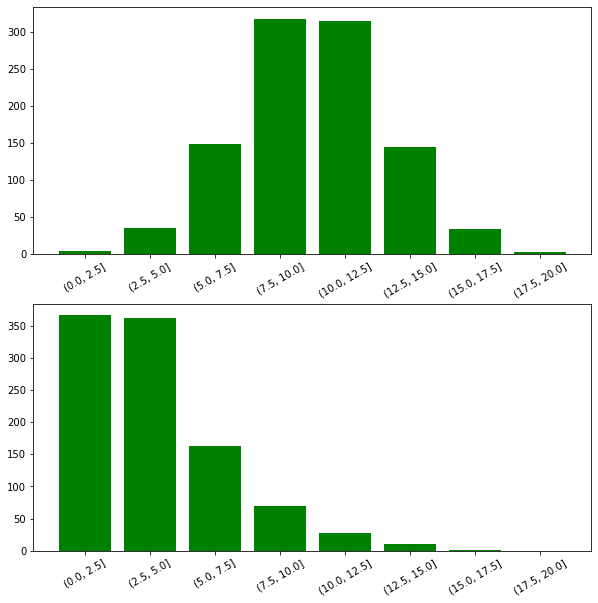

In [56]:
import matplotlib.pyplot as plt

counts_normal = df.groupby('normal').size()
counts_chi_sqr = df.groupby('chi').size()
plt.figure(figsize=(10,10))
print(counts_normal)
print(counts_chi_sqr)
plt.subplot(211)

# plt.bar(df['normal'].cat.categories,counts_normal.values, color='g')
categories = df['normal'].cat.categories
print(categories)
ind = np.array([x for x,_ in enumerate(categories)])
plt.bar(ind, counts_normal, label='Normal', color='g')
plt.xticks(ind, labels=categories, rotation=30)

plt.subplot(212)
categories = df['chi'].cat.categories
ind = np.array([x for x,_ in enumerate(categories)])
plt.bar(ind, counts_chi_sqr, label='Normal', color='g')
plt.xticks(ind, labels=categories, rotation=30)

plt.show()




# categories = df['normal'].cat.categories
# ind = np.array([x for x, _ in enumerate(categories)])
# print(ind)
# width = 0.35       
# plt.bar(ind, a, width, label='Normal')
# plt.bar(ind + width, b, width,
#     label='Chi Square')

# plt.xticks(ind + width / 2, categories)
# plt.legend()
# plt.xticks(rotation = 90)
# plt.show()

In [57]:
x = ["cat", "dog"]
list(enumerate(x))

[(0, 'cat'), (1, 'dog')]